In [105]:
import pandas as pd
import numpy as np
import seaborn as sns

In [106]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn .model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [9]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [21]:
x=df.iloc[:,1:]
y=df.iloc[:,0]


In [23]:
X_train ,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [29]:
clf=DecisionTreeClassifier()

In [31]:
clf.fit(X_train,Y_train)
ypred=clf.predict(X_test)

In [37]:
accuracy_score(Y_test,ypred)

0.6363636363636364

In [87]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [89]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
     ],remainder='passthrough')

In [91]:
 X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [93]:
trf.named_transformers_['first'].bin_edges_


array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [95]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [97]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [99]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [101]:

output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
312,26.0,6.0,26.0000,9.0,"(25.0, 28.0]","(18.75, 26.0]"
484,25.0,6.0,91.0792,13.0,"(23.0, 25.0]","(76.292, 108.9]"
813,6.0,1.0,31.2750,11.0,"(0.42, 6.0]","(26.55, 31.275]"
142,24.0,5.0,15.8500,7.0,"(23.0, 25.0]","(14.454, 18.75]"
289,22.0,4.0,7.7500,1.0,"(21.0, 23.0]","(7.25, 7.775]"


In [103]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,Y_train)
y_pred2=clf.predict(X_test_trf)

In [85]:
accuracy_score(Y_test,y_pred2)

0.6433566433566433

<Axes: xlabel='Age', ylabel='Count'>

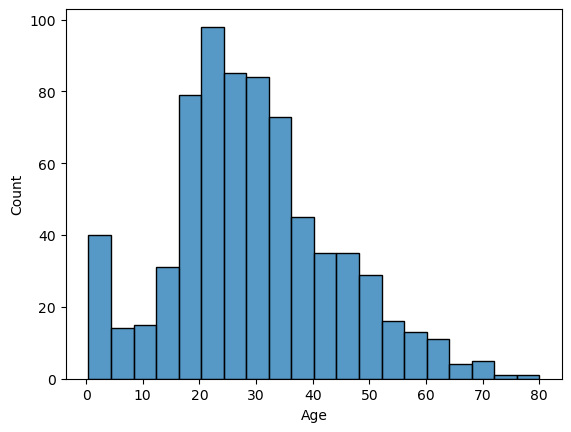

In [111]:
sns.histplot(x=df['Age'])

<Axes: xlabel='age', ylabel='Count'>

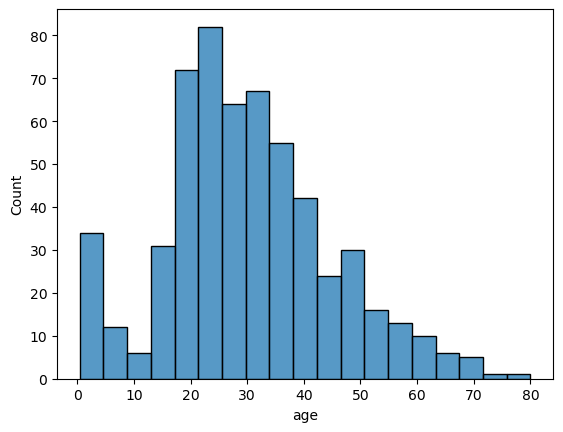

In [113]:
sns.histplot(x=output['age'])